In [34]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt


In [35]:
#Load the dataset
df=pd.read_csv(r"C:\Users\ASHWARTH\Downloads\TTWOPrediction1.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,110.029999,113.070000,109.550003,112.879997,112.879997,1569300
1,2018-01-03,113.470001,114.699997,112.739998,113.879997,113.879997,1451500
2,2018-01-04,114.919998,115.279999,112.589996,114.019997,114.019997,1319300
3,2018-01-05,114.910004,117.190002,114.279999,116.910004,116.910004,1513600
4,2018-01-08,116.500000,120.180000,115.110001,117.370003,117.370003,1591400


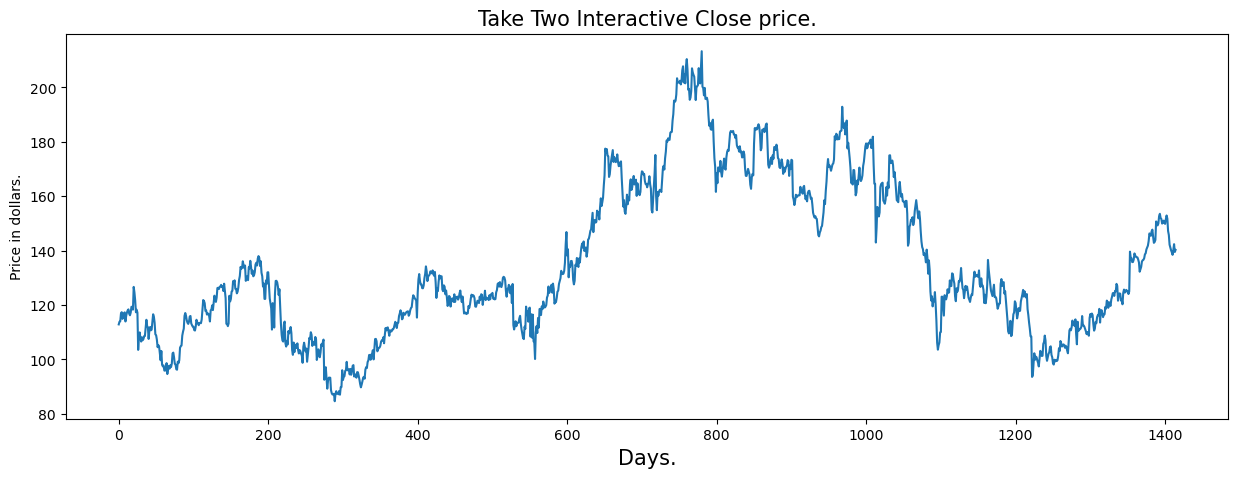

In [36]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Take Two Interactive Close price.', fontsize=15)
plt.xlabel('Days.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [37]:
#Split the data into training and testing
train_data= df.iloc[:int(.60*len(df)), :]
test_data=df.iloc[int(.60*len(df)):, :]

In [38]:
#Define the features and the target variable

features = ['Open','Volume']
target = 'Close'

In [39]:
#Create and train the model
model = xgb.XGBRegressor()
model.fit(train_data[features], train_data[target])

C:\Users\ASHWARTH\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [40]:
#Make and show the predictions on the Test data
predictions = model.predict(test_data[features])
print('Model Predictions:')
print(predictions)

Model Predictions:
[167.21664  167.64789  183.0452   184.5969   184.0607   185.3053
 184.77638  184.84619  186.34143  183.9519   184.61319  178.05634
 177.93298  184.39772  185.74309  186.04486  184.18144  186.87047
 183.9475   183.99176  177.43452  169.93721  169.71521  173.48254
 172.20758  171.4079   171.01443  178.95331  173.25557  178.06638
 178.02403  175.59131  184.05438  177.16275  173.33603  170.5314
 171.27219  173.55624  174.93588  173.60603  167.76294  168.02055
 166.19826  172.01257  167.09827  171.64877  169.51926  173.2422
 172.85423  170.29518  171.08655  168.4189   173.91014  159.91876
 160.55864  154.79997  151.571    157.01587  161.47514  161.4409
 156.75575  161.25133  157.45157  158.52269  163.89828  163.45302
 162.79204  160.95079  164.26947  164.68985  160.58524  159.069
 157.19785  157.00537  162.49808  161.63582  162.32695  160.37648
 158.36008  156.14095  154.17145  156.63145  156.70746  155.72409
 154.39366  148.52863  153.6303   149.17987  148.04999  149.403

In [41]:
#Show the actual values
print('Actual Values:')
print(test_data[target])

Actual Values:
849     167.690002
850     179.350006
851     185.080002
852     184.360001
853     185.020004
           ...    
1410    138.460007
1411    140.199997
1412    142.380005
1413    139.509995
1414    140.270004
Name: Close, Length: 566, dtype: float64


In [42]:
#Show the models accuracy
accuracy = model.score(test_data[features],test_data[target])
print('Accuracy:')
print(accuracy)

Accuracy:
0.9822622824901145


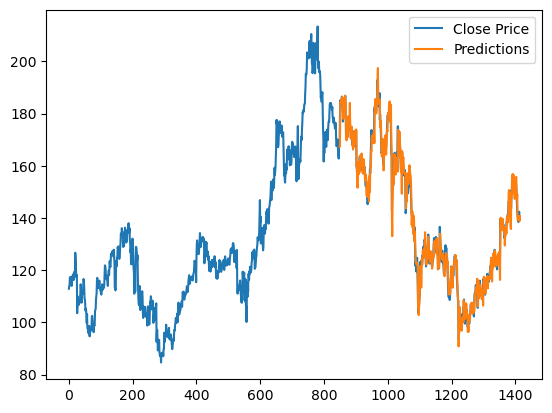

In [43]:
#plot the predictions and the close price
plt.plot(df['Close'], label = 'Close Price')
plt.plot(test_data[target].index, predictions, label = 'Predictions')
plt.legend()
plt.show()